# Import

In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from bayesian_network import BayesianNetwork

# Prepare Data

| 英語 | 日本語 |
|------|--------|
| MedInc | 中央所得 |
| HouseAge | 住宅年数 |
| AveRooms | 平均部屋数 |
| AveBedrms | 平均寝室数 |
| Population | 人口 |
| AveOccup | 平均居住者数 |
| Latitude | 緯度 |
| Longitude | 経度 |
| MedHouseVal | 中央住宅価値 |

In [4]:
df_original = pd.read_csv("./data/california.csv")
df_original

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23,4.526
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22,3.585
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24,3.521
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25,3.413
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25,5.045455,1.133333,845,2.560606,39.48,-121.09,0.781
20636,2.5568,18,6.114035,1.315789,356,3.122807,39.49,-121.21,0.771
20637,1.7000,17,5.205543,1.120092,1007,2.325635,39.43,-121.22,0.923
20638,1.8672,18,5.329513,1.171920,741,2.123209,39.43,-121.32,0.847


In [5]:
bin_df = pd.DataFrame([])
n_bin = 3
for name in df_original.columns:
    bin_df[name], _ = pd.cut(df_original[name], n_bin, labels=np.arange(n_bin)+1, retbins=True)
bin_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2,3,1,1,1,1,2,1,3
1,2,2,1,1,1,1,2,1,3
2,2,3,1,1,1,1,2,1,3
3,2,3,1,1,1,1,2,1,3
4,1,3,1,1,1,1,2,1,3


# Main

In [6]:
connection_df_dict, p_value_df_dict = BayesianNetwork.analyze_connection(bin_df=bin_df, n_dim_total=3, p_threshold=0.05)

                     DIM0                     
----------------------------------------------------
              Collect ConnectionInfos               
----------------------------------------------------
MedInc , HouseAge | [] -> is connecting: True [0.00]
MedInc , AveRooms | [] -> is connecting: False [0.76]
MedInc , AveBedrms | [] -> is connecting: False [0.94]
MedInc , Population | [] -> is connecting: True [0.03]
MedInc , AveOccup | [] -> is connecting: True [0.00]
MedInc , Latitude | [] -> is connecting: True [0.00]
MedInc , Longitude | [] -> is connecting: True [0.00]
MedInc , MedHouseVal | [] -> is connecting: True [0.00]
HouseAge , AveRooms | [] -> is connecting: False [0.21]
HouseAge , AveBedrms | [] -> is connecting: False [0.45]
HouseAge , Population | [] -> is connecting: True [0.00]
HouseAge , AveOccup | [] -> is connecting: False [0.15]
HouseAge , Latitude | [] -> is connecting: True [0.00]
HouseAge , Longitude | [] -> is connecting: True [0.00]
HouseAge , MedHouseVal |

In [7]:
closeness_df_dict = BayesianNetwork.analyze_closeness(target_col="MedHouseVal", connection_df_dict=connection_df_dict)

# Result

## Funcs

In [8]:
def highlight_cell(val):
    if val == 0:
        return f'background-color: ; color: black;'

    val=1-(val-1)/3
    normalized_rgb = plt.colormaps["Greens"](val)
    rgb = tuple([int(255 * x) for x in normalized_rgb])
    hex = "#{:02x}{:02x}{:02x}".format(*rgb)
    color = "black" if val<0.5 else "white"
    return f"background-color: {hex}; color: {color};"

In [9]:
def highlight_cell2(val):
    if pd.isna(val):
        return f'background-color: ; color: black;'

    val=1-val
    normalized_rgb = plt.colormaps["Greens"](val)
    rgb = tuple([int(255 * x) for x in normalized_rgb])
    hex = '#{:02x}{:02x}{:02x}'.format(*rgb)        
    color = "black" if val<0.5 else "white"
    return f"background-color: {hex}; color: {color};"

## Table

In [10]:
for label, connection_df in connection_df_dict.items():
    print(f"=========================== {label} ===========================")
    display(connection_df.astype(int).style.applymap(highlight_cell))
    print()

=========================== Init ===========================


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,0,1,1,1,1,1,1,1,1
HouseAge,0,0,1,1,1,1,1,1,1
AveRooms,0,0,0,1,1,1,1,1,1
AveBedrms,0,0,0,0,1,1,1,1,1
Population,0,0,0,0,0,1,1,1,1
AveOccup,0,0,0,0,0,0,1,1,1
Latitude,0,0,0,0,0,0,0,1,1
Longitude,0,0,0,0,0,0,0,0,1
MedHouseVal,0,0,0,0,0,0,0,0,0



=========================== Level0 ===========================


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,0,1,0,0,1,1,1,1,1
HouseAge,0,0,0,0,1,0,1,1,1
AveRooms,0,0,0,1,0,0,1,0,0
AveBedrms,0,0,0,0,0,0,1,0,0
Population,0,0,0,0,0,0,0,0,0
AveOccup,0,0,0,0,0,0,0,0,0
Latitude,0,0,0,0,0,0,0,1,1
Longitude,0,0,0,0,0,0,0,0,1
MedHouseVal,0,0,0,0,0,0,0,0,0



=========================== Level1 ===========================


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,0,1,0,0,1,1,1,1,1
HouseAge,0,0,0,0,1,0,1,1,1
AveRooms,0,0,0,1,0,0,1,0,0
AveBedrms,0,0,0,0,0,0,1,0,0
Population,0,0,0,0,0,0,0,0,0
AveOccup,0,0,0,0,0,0,0,0,0
Latitude,0,0,0,0,0,0,0,1,1
Longitude,0,0,0,0,0,0,0,0,1
MedHouseVal,0,0,0,0,0,0,0,0,0



=========================== Level2 ===========================


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,0,1,0,0,1,1,1,1,1
HouseAge,0,0,0,0,1,0,1,1,1
AveRooms,0,0,0,1,0,0,1,0,0
AveBedrms,0,0,0,0,0,0,1,0,0
Population,0,0,0,0,0,0,0,0,0
AveOccup,0,0,0,0,0,0,0,0,0
Latitude,0,0,0,0,0,0,0,1,1
Longitude,0,0,0,0,0,0,0,0,1
MedHouseVal,0,0,0,0,0,0,0,0,0



=========================== Level3 ===========================


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,0,1,0,0,1,1,1,0,1
HouseAge,0,0,0,0,1,0,1,1,1
AveRooms,0,0,0,1,0,0,1,0,0
AveBedrms,0,0,0,0,0,0,1,0,0
Population,0,0,0,0,0,0,0,0,0
AveOccup,0,0,0,0,0,0,0,0,0
Latitude,0,0,0,0,0,0,0,1,1
Longitude,0,0,0,0,0,0,0,0,1
MedHouseVal,0,0,0,0,0,0,0,0,0


In [11]:
for label, p_value_df in p_value_df_dict.items():
    print(f"=========================== {label} ===========================")
    display(p_value_df.style.applymap(highlight_cell2))
    print()

=========================== Init ===========================


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,nan,nan,nan,nan,nan,nan,nan,nan,nan
HouseAge,nan,nan,nan,nan,nan,nan,nan,nan,nan
AveRooms,nan,nan,nan,nan,nan,nan,nan,nan,nan
AveBedrms,nan,nan,nan,nan,nan,nan,nan,nan,nan
Population,nan,nan,nan,nan,nan,nan,nan,nan,nan
AveOccup,nan,nan,nan,nan,nan,nan,nan,nan,nan
Latitude,nan,nan,nan,nan,nan,nan,nan,nan,nan
Longitude,nan,nan,nan,nan,nan,nan,nan,nan,nan
MedHouseVal,nan,nan,nan,nan,nan,nan,nan,nan,nan



=========================== Level0 ===========================


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,nan,0.000000,0.762042,0.935048,0.026096,0.000000,0.000000,0.000000,0.000000
HouseAge,nan,nan,0.210965,0.449496,0.000001,0.149048,0.000000,0.000000,0.000000
AveRooms,nan,nan,nan,0.000000,0.999995,1.000000,0.000000,0.486708,0.595593
AveBedrms,nan,nan,nan,nan,0.999999,1.000000,0.003026,0.316227,0.326322
Population,nan,nan,nan,nan,nan,0.999999,0.887765,0.512525,0.212210
AveOccup,nan,nan,nan,nan,nan,nan,0.050968,0.424105,0.463793
Latitude,nan,nan,nan,nan,nan,nan,nan,0.000000,0.000000
Longitude,nan,nan,nan,nan,nan,nan,nan,nan,0.000000
MedHouseVal,nan,nan,nan,nan,nan,nan,nan,nan,nan



=========================== Level1 ===========================


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,nan,0.000000,0.762042,0.935048,0.026096,0.000000,0.000000,0.000000,0.000000
HouseAge,nan,nan,0.210965,0.449496,0.000001,0.149048,0.000000,0.000000,0.000000
AveRooms,nan,nan,nan,0.000000,0.999995,1.000000,0.000000,0.486708,0.595593
AveBedrms,nan,nan,nan,nan,0.999999,1.000000,0.003026,0.316227,0.326322
Population,nan,nan,nan,nan,nan,0.999999,0.887765,0.512525,0.212210
AveOccup,nan,nan,nan,nan,nan,nan,0.050968,0.424105,0.463793
Latitude,nan,nan,nan,nan,nan,nan,nan,0.000000,0.000000
Longitude,nan,nan,nan,nan,nan,nan,nan,nan,0.000000
MedHouseVal,nan,nan,nan,nan,nan,nan,nan,nan,nan



=========================== Level2 ===========================


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,nan,0.000000,0.762042,0.935048,0.026096,0.000000,0.000000,0.000000,0.000000
HouseAge,nan,nan,0.210965,0.449496,0.000001,0.149048,0.000000,0.000000,0.000000
AveRooms,nan,nan,nan,0.000000,0.999995,1.000000,0.000000,0.486708,0.595593
AveBedrms,nan,nan,nan,nan,0.999999,1.000000,0.003026,0.316227,0.326322
Population,nan,nan,nan,nan,nan,0.999999,0.887765,0.512525,0.212210
AveOccup,nan,nan,nan,nan,nan,nan,0.050968,0.424105,0.463793
Latitude,nan,nan,nan,nan,nan,nan,nan,0.000000,0.000000
Longitude,nan,nan,nan,nan,nan,nan,nan,nan,0.000000
MedHouseVal,nan,nan,nan,nan,nan,nan,nan,nan,nan



=========================== Level3 ===========================


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,nan,0.000000,0.762042,0.935048,0.026096,0.000000,0.000000,0.091250,0.000000
HouseAge,nan,nan,0.210965,0.449496,0.000001,0.149048,0.000000,0.000000,0.000000
AveRooms,nan,nan,nan,0.000000,0.999995,1.000000,0.000000,0.486708,0.595593
AveBedrms,nan,nan,nan,nan,0.999999,1.000000,0.003026,0.316227,0.326322
Population,nan,nan,nan,nan,nan,0.999999,0.887765,0.512525,0.212210
AveOccup,nan,nan,nan,nan,nan,nan,0.050968,0.424105,0.463793
Latitude,nan,nan,nan,nan,nan,nan,nan,0.000000,0.000000
Longitude,nan,nan,nan,nan,nan,nan,nan,nan,0.000000
MedHouseVal,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [12]:
for label, closeness_df in closeness_df_dict.items():
    print(f"=========================== {label} ===========================")
    display(closeness_df.style.applymap(highlight_cell))
    print()

=========================== Init ===========================


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,0,2,2,2,2,2,2,2,1
HouseAge,0,0,2,2,2,2,2,2,1
AveRooms,0,0,0,2,2,2,2,2,1
AveBedrms,0,0,0,0,2,2,2,2,1
Population,0,0,0,0,0,2,2,2,1
AveOccup,0,0,0,0,0,0,2,2,1
Latitude,0,0,0,0,0,0,0,2,1
Longitude,0,0,0,0,0,0,0,0,1
MedHouseVal,0,0,0,0,0,0,0,0,0



=========================== Level0 ===========================


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,0,2,0,0,2,2,2,2,1
HouseAge,0,0,0,0,2,0,2,2,1
AveRooms,0,0,0,3,0,0,2,0,0
AveBedrms,0,0,0,0,0,0,2,0,0
Population,0,0,0,0,0,0,0,0,0
AveOccup,0,0,0,0,0,0,0,0,0
Latitude,0,0,0,0,0,0,0,2,1
Longitude,0,0,0,0,0,0,0,0,1
MedHouseVal,0,0,0,0,0,0,0,0,0



=========================== Level1 ===========================


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,0,2,0,0,2,2,2,2,1
HouseAge,0,0,0,0,2,0,2,2,1
AveRooms,0,0,0,3,0,0,2,0,0
AveBedrms,0,0,0,0,0,0,2,0,0
Population,0,0,0,0,0,0,0,0,0
AveOccup,0,0,0,0,0,0,0,0,0
Latitude,0,0,0,0,0,0,0,2,1
Longitude,0,0,0,0,0,0,0,0,1
MedHouseVal,0,0,0,0,0,0,0,0,0



=========================== Level2 ===========================


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,0,2,0,0,2,2,2,2,1
HouseAge,0,0,0,0,2,0,2,2,1
AveRooms,0,0,0,3,0,0,2,0,0
AveBedrms,0,0,0,0,0,0,2,0,0
Population,0,0,0,0,0,0,0,0,0
AveOccup,0,0,0,0,0,0,0,0,0
Latitude,0,0,0,0,0,0,0,2,1
Longitude,0,0,0,0,0,0,0,0,1
MedHouseVal,0,0,0,0,0,0,0,0,0



=========================== Level3 ===========================


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,0,2,0,0,2,2,2,0,1
HouseAge,0,0,0,0,2,0,2,2,1
AveRooms,0,0,0,3,0,0,2,0,0
AveBedrms,0,0,0,0,0,0,2,0,0
Population,0,0,0,0,0,0,0,0,0
AveOccup,0,0,0,0,0,0,0,0,0
Latitude,0,0,0,0,0,0,0,2,1
Longitude,0,0,0,0,0,0,0,0,1
MedHouseVal,0,0,0,0,0,0,0,0,0


## Graph

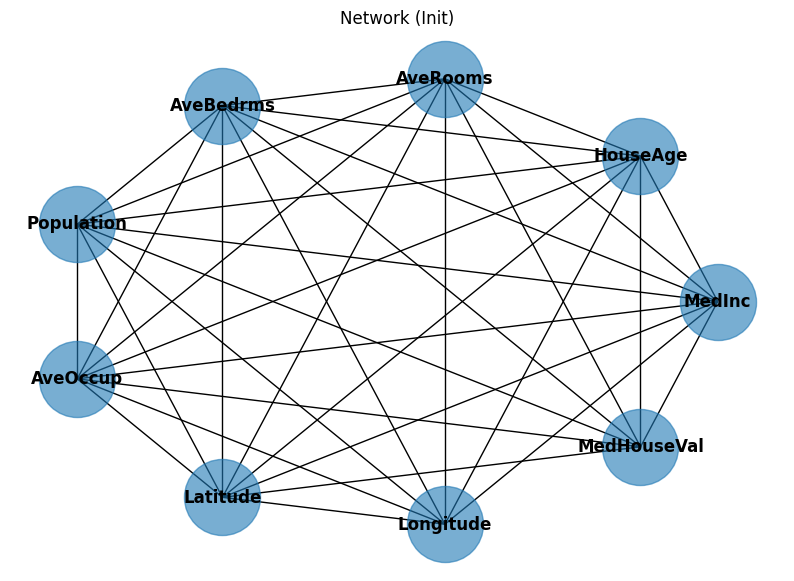

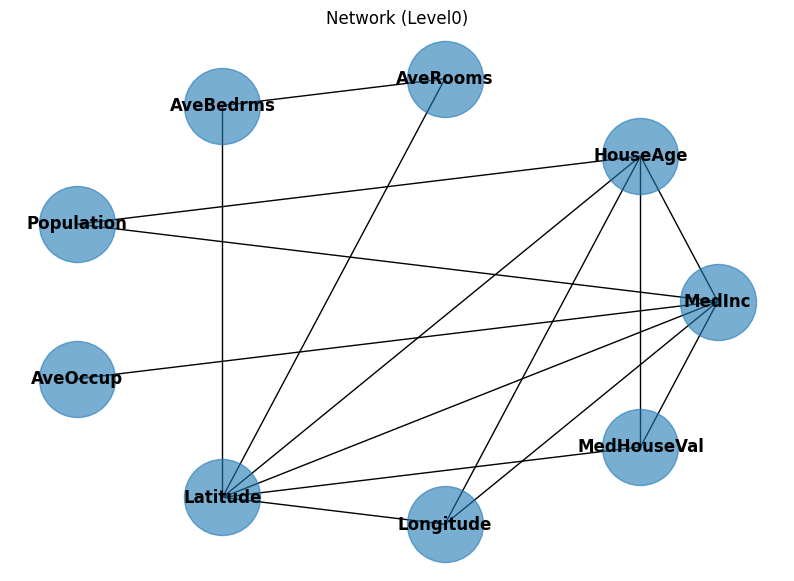

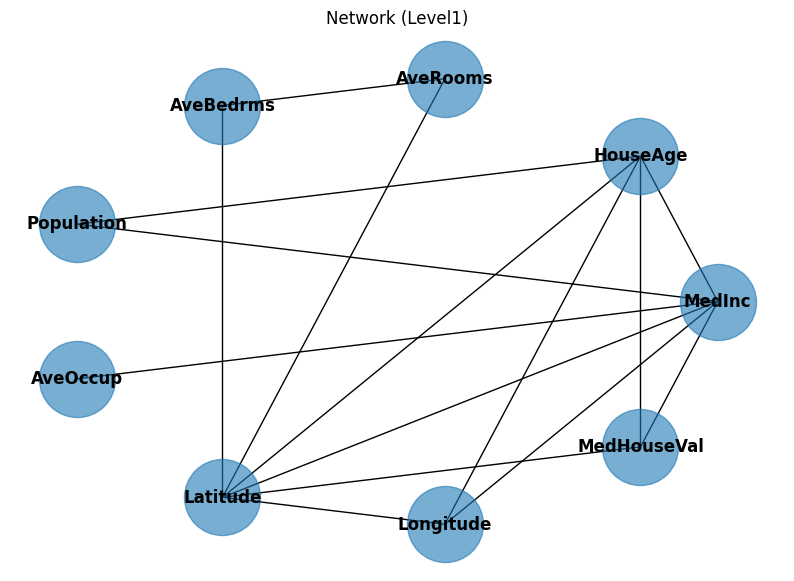

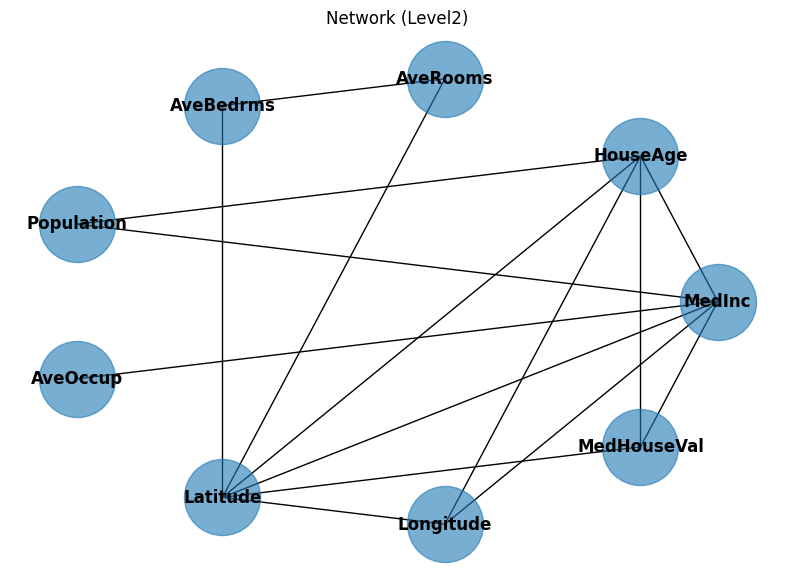

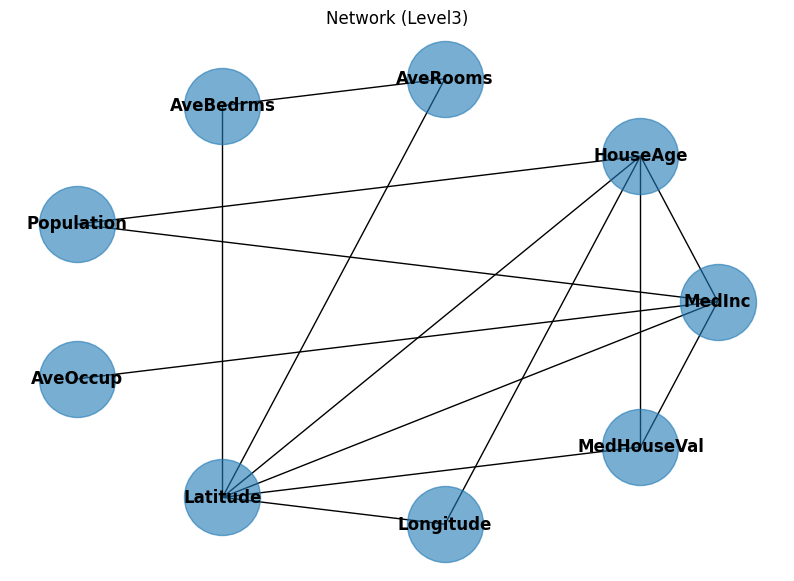

In [13]:
for label, connection_df in connection_df_dict.items():
    BayesianNetwork.visualize_connection(connection_df, f"Network ({label})")

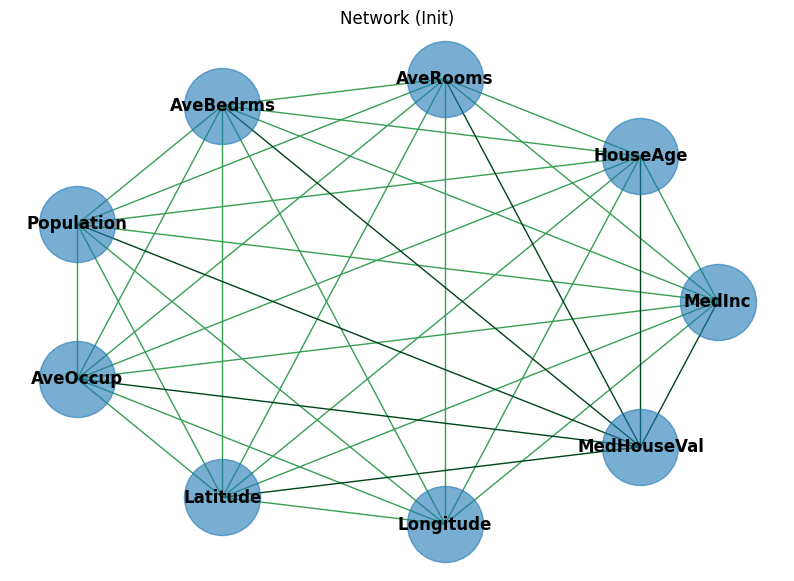

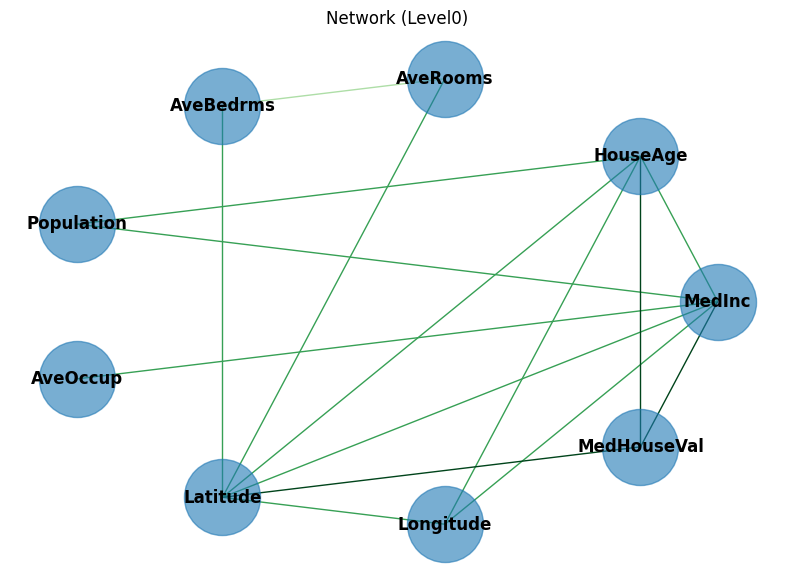

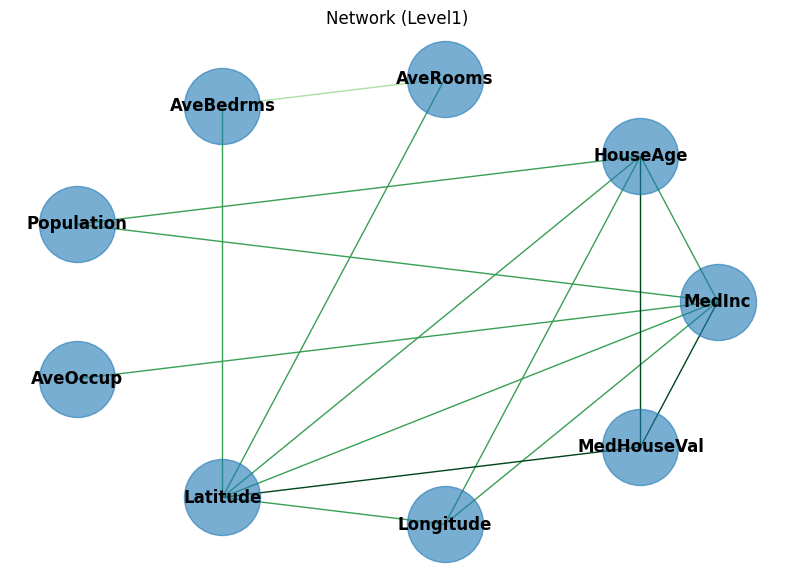

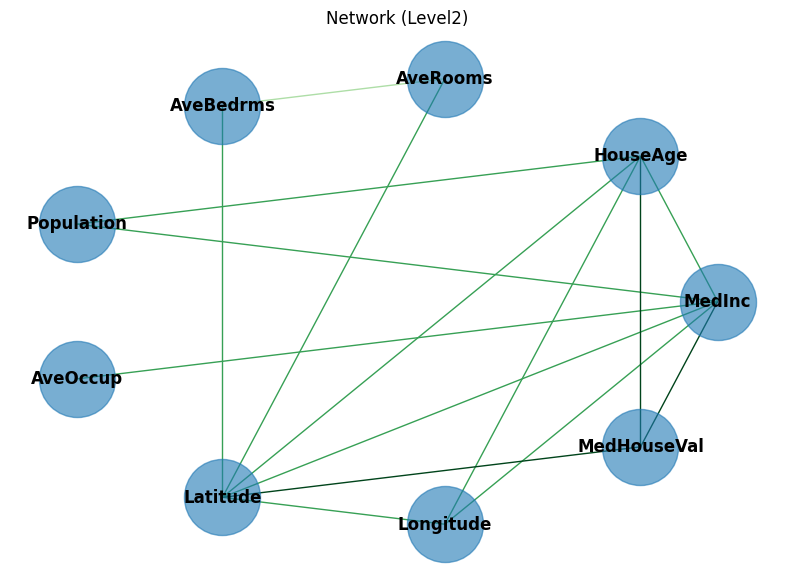

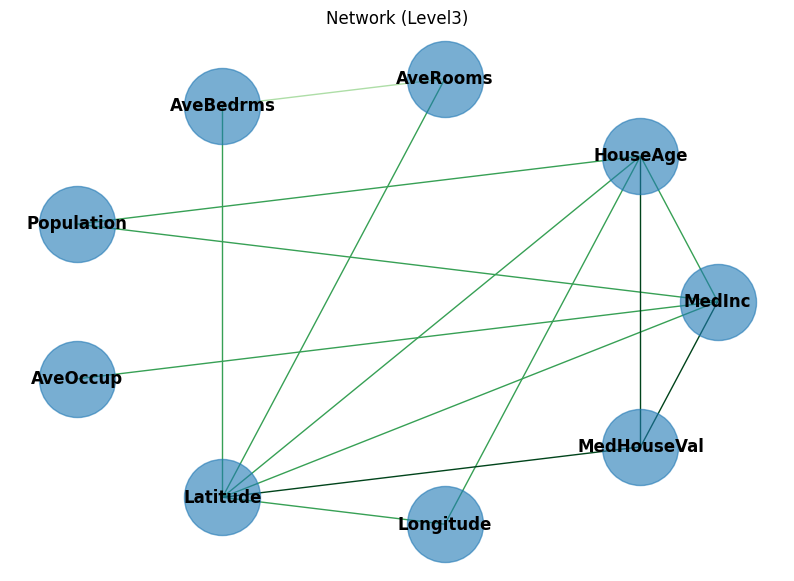

In [14]:
for label, closeness_df in closeness_df_dict.items():
    BayesianNetwork.visualize_closeness(closeness_df, f"Network ({label})")

| 英語 | 日本語 |
|------|--------|
| MedInc | 中央所得 |
| HouseAge | 住宅年数 |
| AveRooms | 平均部屋数 |
| AveBedrms | 平均寝室数 |
| Population | 人口 |
| AveOccup | 平均居住者数 |
| Latitude | 緯度 |
| Longitude | 経度 |
| MedHouseVal | 中央住宅価値 |